# My Simple Geometry
Poisson Equation on unit interval / square / cube domain.

## Import Libraries 

In [3]:
using LinearAlgebra
using Plots

## Section 1: Unit Square Domain with Mesh with three (3) cells
Here we assume $0 < x < 1$. Generate mesh with 3 cells using blockMesh. The coordinates of the cell centers are $x_1 = 1/6$, $x_2 = 1/2$ and $x_3 = 5/6$.  

### Section 1.1:/ Geometry Definition and Mesh Generation 

Check mesh using checkMesh: shows 3 hex elements using 

blocks
(
  hex (0 1 2 3 4 5 6 7) (3 1 1) edgeGrading (1 1 1 1 2 2 2 2 3 3 3 3)
);

### Section 2.1/ Coefficient matrix 

Cell centered finite volume representation with resulting matrix 
$A = \begin{pmatrix} 1.5 & -1.5 & 0 \\ -1.5 & 3 & -1.5 \\ 0 & -1.5 & 1.5 \end{pmatrix}$

Resulting Compressed Sparse Row (CSR) representation 

$\text{rows} = \begin{pmatrix} 0 & 2 & 5 & 7 \end{pmatrix}$

$\text{cols} = \begin{pmatrix} 0 & 1 & 0 & 1 & 2 & 1 & 2 \end{pmatrix}$

$\text{vals} = \begin{pmatrix} 1.5 & -1.5 & -1.5 & 3 & -1.5 & -1.5 & 1.5 \end{pmatrix}$

### Section 3.1/ Right-Hand Side Vector 
In case that the source term is constant equal one, then each component of the resulting right-hand side vector is equal to
$
f_i = \int_{x_i}^{x_{i+1}} 1 \, dx = x_{i+1} - x_i \, . 
$
The resulting coefficient vector becomes 
${\mathbf f} = \begin{pmatrix} 1/3 \\ 1/3 \\ 1/3 \end{pmatrix}$

In [4]:
# Define matrix A 
A = [1.5 -1.5 0; -1.5 3 -1.5; 0 -1.5 1.5]

3×3 Matrix{Float64}:
  1.5  -1.5   0.0
 -1.5   3.0  -1.5
  0.0  -1.5   1.5

In [5]:
# Compute eigenvalues of A and verify A to be singular 
eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 3.552713678800501e-15
 1.5000000000000036
 4.5
vectors:
3×3 Matrix{Float64}:
 0.57735   0.707107     -0.408248
 0.57735  -6.28037e-16   0.816497
 0.57735  -0.707107     -0.408248

In [6]:
A[1,1] = 2*A[1,1]
f = [1/3; 1/3 ; 1/3]
u = A \ f

3-element Vector{Float64}:
 0.6666666666666666
 1.1111111111111112
 1.3333333333333333

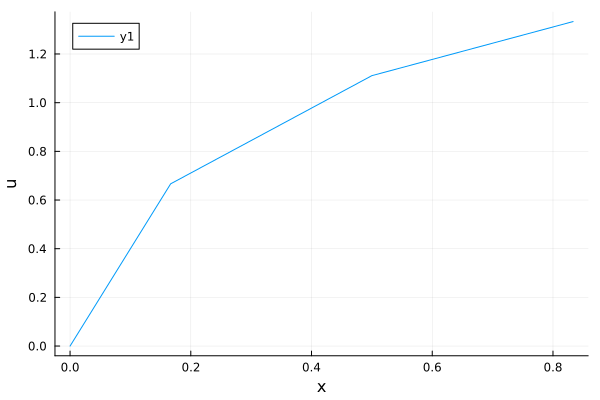

In [7]:
u_with_boundary = [0; u]
x = [0;1/6;1/2;5/6]
plot(x,u_with_boundary,xlabel="x", ylabel="u")

## Section 2: Unit Square Domain with Mesh with four (4) cells 
Here we assume again $0 < x < 1$. Generate mesh using blockMesh with 4 cells ($ncells = 4$) with 3 internal faces ($nfaces = 3$). The coordinates of the cell centers are $x_1 = 1/8$, $x_2 = 3/8$, $x_3 = 5/8$ and $x_4 = 7/8$.

### Section 1.2:/ Geometry Definition and Mesh Generation

Check mesh using checkMesh: shows 4 hex elements using 

blocks
(
  hex (0 1 2 3 4 5 6 7) (4 1 1) edgeGrading (1 1 1 1 2 2 2 2 3 3 3 3)
);

### Section 2.2/ Coefficient matrix
Cell centered finite volume representation with resulting matrix of size 
$ncells \times ncells = 4 \times 4$ and $nfaces$ non-zero elements in the upper and lower triangle:  
$A = \begin{pmatrix} 2 & -2 & 0  & 0 \\ 
                    -2 &  4 & -2 & 0 \\ 
                     0 & -2 & 4  & -2 \\
                     0 &  0 & -2 & 2 \end{pmatrix}$

Resulting Compressed Sparse Row (CSR) representation 

$\text{rows} = \begin{pmatrix} 0 & 2 & 5 & 8 & 10 \end{pmatrix}$

$\text{cols} = \begin{pmatrix} 0 & 1 & 0 & 1 & 2 & 1 & 2 & 3 & 2 & 3 \end{pmatrix}$

$\text{vals} = \begin{pmatrix} 2 & -2 & -2 & 4 & -2 & -2 & 4 & -2 & -2 & 2 \end{pmatrix}$

### Section 3.2/ Coefficient matrix

The resulting coefficient vector becomes 
${\mathbf f} = \begin{pmatrix} 1/4 \\ 1/4 \\ 1/4 \\ 1/4 \end{pmatrix}$

In [19]:
# Define matrix A 
A = [2 -2 0 0; -2 4 -2 0; 0 -2 4 -2; 0 0 -2 2]

4×4 Matrix{Int64}:
  2  -2   0   0
 -2   4  -2   0
  0  -2   4  -2
  0   0  -2   2

In [20]:
# Compute eigenvalues of A and verify A to be singular 
eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
4-element Vector{Float64}:
 0.0
 1.1715728752538084
 3.9999999999999987
 6.828427124746179
vectors:
4×4 Matrix{Float64}:
 0.5   0.653281  -0.5   0.270598
 0.5   0.270598   0.5  -0.653281
 0.5  -0.270598   0.5   0.653281
 0.5  -0.653281  -0.5  -0.270598

In [21]:
A[1,1] = 2*A[1,1]
f = [1; 1 ; 1; 1]
u = A \ f

4-element Vector{Float64}:
 1.9999999999999993
 3.4999999999999987
 4.499999999999998
 4.999999999999998

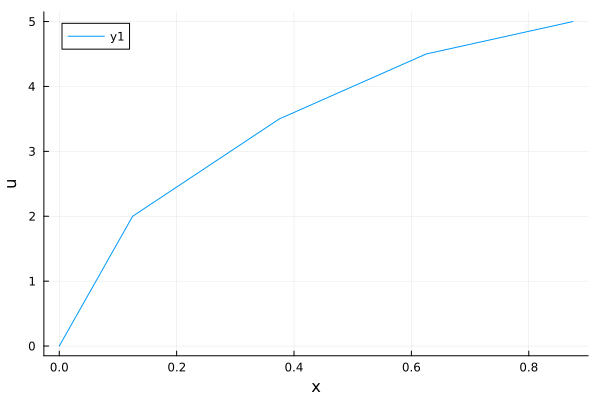

In [23]:
u_with_boundary = [0; u]
x = [0;1/8;3/8;5/8;7/8]
plot(x,u_with_boundary,xlabel="x", ylabel="u")

## Section 3:/ Unit Square Domain with Mesh with more cells

In [38]:
N = 16; # number of cells
h = 1/N; # cell width 

#..construct the coefficient matrix 
e = ones(N);  
A = Tridiagonal(-e[2:end], 2*e, -e[2:end]); 
A = (1/(2*h))*A; 

#..handle the boundary conditions in last row of the matrix 
A[end,end]=A[end,end]/2;     
display(A)

16×16 Tridiagonal{Float64, Vector{Float64}}:
 16.0  -8.0    ⋅     ⋅     ⋅     ⋅   …    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
 -8.0  16.0  -8.0    ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅   -8.0  16.0  -8.0    ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅   -8.0  16.0  -8.0    ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅   -8.0  16.0  -8.0       ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅   -8.0  16.0  …    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅   -8.0       ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅      -8.0    ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   …  16.0  -8.0    ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅      -8.0  16.0  -8.0    ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅   -8.0  16.

In [39]:
# Set the right-hand side vector 
f = ones(N); 
# Solve the linear system for u 
u = A \ f; 

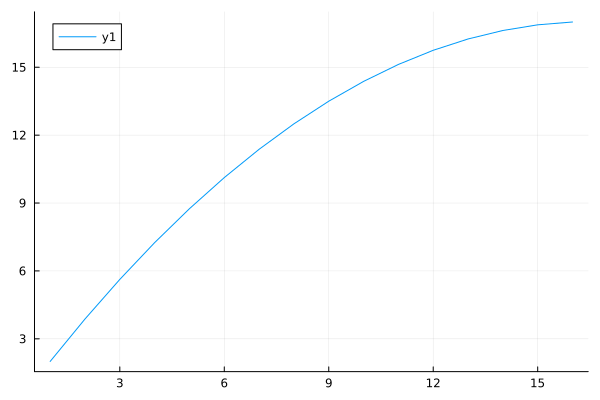

In [40]:
plot(u)